# Week 3, Day 4: Decision Trees and Random Forests

## Learning Objectives
- Understand Decision Tree concepts
- Learn Random Forest ensemble method
- Master feature importance analysis
- Practice implementing tree-based models

## Topics Covered
1. Decision Trees
2. Random Forests
3. Feature Importance
4. Model Evaluation

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Decision Trees

Decision Tree Performance:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.86      0.92        28

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



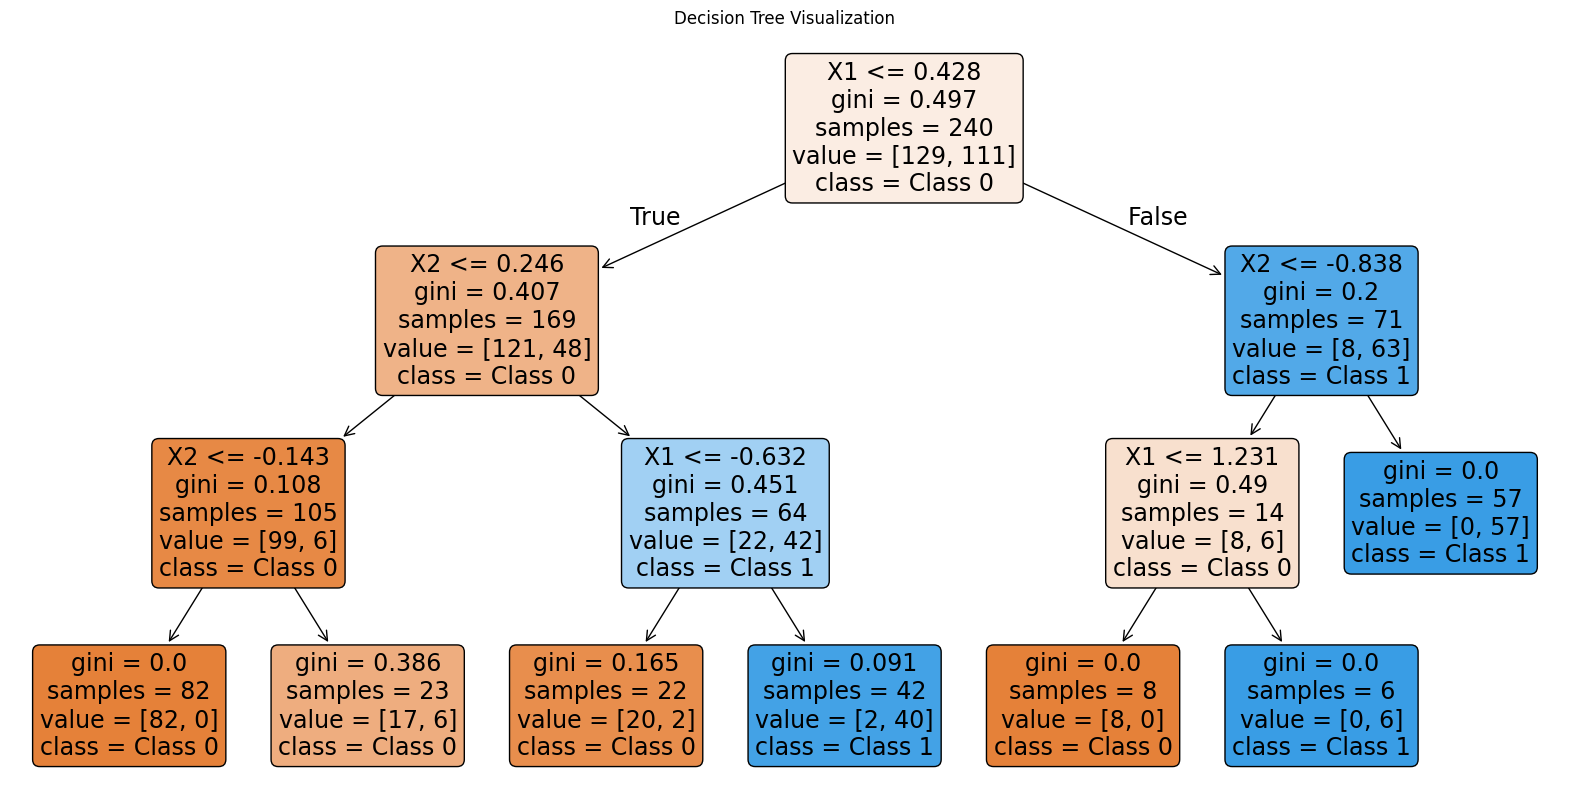

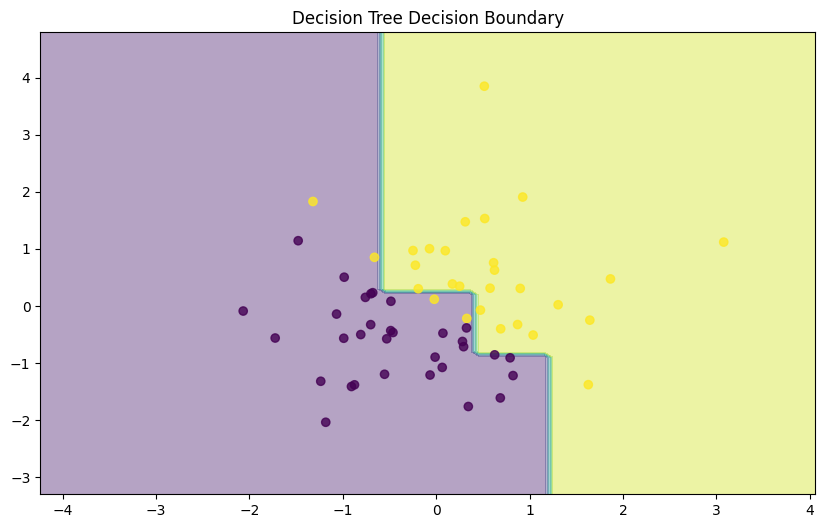

In [2]:
def decision_tree_example():
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 300

    # Create features
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred = dt.predict(X_test)

    # Print model performance
    print("Decision Tree Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize decision tree
    plt.figure(figsize=(20,10))
    plot_tree(dt, feature_names=['X1', 'X2'],
              class_names=['Class 0', 'Class 1'],
              filled=True, rounded=True)
    plt.title('Decision Tree Visualization')
    plt.show()

    # Visualize decision boundary
    plt.figure(figsize=(10,6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.title('Decision Tree Decision Boundary')
    plt.show()

decision_tree_example()

## 2. Random Forests

In [ ]:
def random_forest_example():
    # Generate more complex synthetic data
    np.random.seed(42)
    n_samples = 500

    # Create features with non-linear relationship
    X = np.random.randn(n_samples, 4)
    y = ((X[:, 0]**2 + X[:, 1]**2 > 1) & (X[:, 2] + X[:, 3] > 0)).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Print model performance
    print("Random Forest Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': [f'Feature {i+1}' for i in range(X.shape[1])],
        'importance': rf.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance in Random Forest')
    plt.show()

    # Visualize predictions vs actual
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0, 1], [0, 1], '--k')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.show()

random_forest_example()

## 3. Hyperparameter Tuning

In [ ]:
def tune_random_forest():
    from sklearn.model_selection import GridSearchCV

    # Generate data
    np.random.seed(42)
    n_samples = 300

    X = np.random.randn(n_samples, 3)
    y = (np.sum(X**2, axis=1) > 3).astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }

    # Create base model
    rf = RandomForestClassifier(random_state=42)

    # Perform grid search
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Evaluate best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("\nTest Set Performance:")
    print(classification_report(y_test, y_pred))

    # Visualize parameter importance
    results = pd.DataFrame(grid_search.cv_results_)

    plt.figure(figsize=(15, 5))

    # Plot n_estimators vs score
    plt.subplot(131)
    sns.boxplot(x='param_n_estimators', y='mean_test_score', data=results)
    plt.title('Score vs n_estimators')

    # Plot max_depth vs score
    plt.subplot(132)
    sns.boxplot(x='param_max_depth', y='mean_test_score', data=results)
    plt.title('Score vs max_depth')

    # Plot min_samples_split vs score
    plt.subplot(133)
    sns.boxplot(x='param_min_samples_split', y='mean_test_score', data=results)
    plt.title('Score vs min_samples_split')

    plt.tight_layout()
    plt.show()

tune_random_forest()

## Practical Exercises

In [ ]:
# Exercise 1: Credit Risk Assessment

def credit_risk_assessment():
    # Generate synthetic credit data
    np.random.seed(42)
    n_samples = 1000

    # Create features
    age = np.random.normal(35, 10, n_samples)
    income = np.random.normal(50000, 20000, n_samples)
    credit_score = np.random.normal(700, 50, n_samples)
    debt_ratio = np.random.normal(0.3, 0.1, n_samples)

    # Create DataFrame
    data = pd.DataFrame({
        'Age': age,
        'Income': income,
        'CreditScore': credit_score,
        'DebtRatio': debt_ratio
    })

    # Generate risk (1 for high risk, 0 for low risk)
    risk = ((credit_score < 650) | (debt_ratio > 0.4) |
           (income < 30000) & (age < 25)).astype(int)
    data['Risk'] = risk

    print("Sample of credit data:")
    print(data.head())

    # Task: Build and compare Decision Tree and Random Forest models
    # 1. Prepare the data
    # 2. Train both models
    # 3. Compare their performance
    # 4. Analyze feature importance
    # 5. Visualize the decision tree

    # Your code here

credit_risk_assessment()

In [ ]:
# Exercise 2: Feature Selection

def feature_selection_exercise():
    # Generate data with irrelevant features
    np.random.seed(42)
    n_samples = 500

    # Create relevant features
    X_relevant = np.random.randn(n_samples, 3)

    # Create irrelevant features
    X_irrelevant = np.random.randn(n_samples, 5)

    # Combine features
    X = np.hstack([X_relevant, X_irrelevant])

    # Create target (only depends on relevant features)
    y = (np.sum(X_relevant**2, axis=1) > 3).astype(int)

    # Task: Use Random Forest to identify important features
    # 1. Train a Random Forest model
    # 2. Analyze feature importance
    # 3. Select the most important features
    # 4. Compare model performance with and without feature selection

    # Your code here

feature_selection_exercise()

## MCQ Quiz

1. What is the main advantage of decision trees?
   - a) High accuracy
   - b) Easy to interpret
   - c) No need for feature scaling
   - d) All of the above

2. What is the main disadvantage of decision trees?
   - a) High bias
   - b) High variance
   - c) Slow training
   - d) High memory usage

3. How does Random Forest reduce overfitting?
   - a) Feature selection
   - b) Ensemble learning
   - c) Pruning
   - d) Regularization

4. What is bagging in Random Forest?
   - a) Feature selection
   - b) Random sampling with replacement
   - c) Tree pruning
   - d) Gradient descent

5. Which parameter controls tree depth?
   - a) n_estimators
   - b) max_depth
   - c) min_samples_split
   - d) criterion

6. What is Gini impurity used for?
   - a) Feature selection
   - b) Node splitting
   - c) Pruning
   - d) Ensemble creation

7. How many trees are typically in a Random Forest?
   - a) 1-10
   - b) 10-50
   - c) 100-1000
   - d) Over 1000

8. What is feature importance in Random Forest based on?
   - a) Tree depth
   - b) Gini importance
   - c) Number of trees
   - d) Training time

9. Which is NOT a hyperparameter in Random Forest?
   - a) n_estimators
   - b) max_depth
   - c) learning_rate
   - d) min_samples_split

10. What is the time complexity of decision tree prediction?
    - a) O(n)
    - b) O(log n)
    - c) O(n log n)
    - d) O(n²)

Answers: 1-d, 2-b, 3-b, 4-b, 5-b, 6-b, 7-c, 8-b, 9-c, 10-b